In [1]:
import matplotlib.pyplot as plt
import h3
import numpy as np

def figure(size=5):
    fig, ax = plt.subplots(figsize=(size, size))

    # ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    return fig, ax

def directed_line(ax, latlng1, latlng2, label=None):
    (y1, x1) = latlng1
    (y2, x2) = latlng2

    ax.plot(
        [x1, x2],
        [y1, y2],
        color = 'black',
    )

    mx = (x1 + x2) / 2
    my = (y1 + y2) / 2

    dx = x2 - x1
    dy = y2 - y1
    length = (dx**2 + dy**2)**0.5
    if length == 0:
        return
    dx /= length
    dy /= length

    # arrowhead only
    style = '->'
    offset = 0.02 * length  # 2% of segment length
    ax.annotate(
        '',
        xy = (
            mx + dx * offset,
            my + dy * offset,
        ),
        xytext = (mx, my),
        arrowprops = dict(
            arrowstyle = style,
            color = 'black',
            lw = 1.5,
            mutation_scale = 22,
            alpha = 0.4,
        )
    )

    # label (offset perpendicular to the line)
    if label is not None:
        # perpendicular direction
        px = -dy
        py = dx
        text_offset = 0.08 * length
        ax.text(
            mx + px * text_offset,
            my + py * text_offset,
            str(label),
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        )

def plot_edge(ax, e):
    line = h3.directed_edge_to_boundary(e)
    line = line[0], line[-1]
    directed_line(ax, *line)


def scale_edge(e, theta=1):
    p1 = h3.cell_to_latlng(h3.get_directed_edge_origin(e))

    bd = h3.directed_edge_to_boundary(e)
    p2, p3 = bd[0], bd[-1]

    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)

    p2 = p1 + theta*(p2 - p1)
    p3 = p1 + theta*(p3 - p1)

    p2 = list(p2)
    p3 = list(p3)

    return p2, p3

def reverse_edge(e):
    return h3.cells_to_directed_edge(*h3.directed_edge_to_cells(e)[::-1])

def reverse_set(edges):
    return set(
        reverse_edge(e)
        for e in edges
    )

def plot_edges(edges):
    fig, ax = figure(5)

    for i, e in enumerate(edges):
        p1, p2 = scale_edge(e, theta=0.9)
        directed_line(ax, p1, p2)

    return fig

In [3]:
cells = [
    '8828308299fffff',
    '882830829dfffff',
    '88283082d7fffff',
    '882830828bfffff',
]

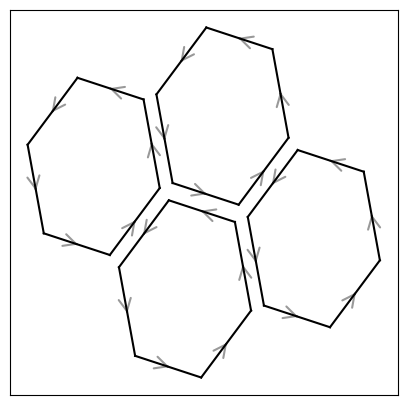

In [4]:
edges = set(
    e
    for c in cells
    for e in h3.origin_to_directed_edges(c)
)

fig = plot_edges(edges)

In [5]:
pairs = set(
    tuple(sorted([e, reverse_edge(e)]))
    for e in (edges & reverse_set(edges))
)
pairs

{('1182830828bfffff', '1682830829dfffff'),
 ('118283082d7fffff', '16828308299fffff'),
 ('12828308299fffff', '1582830829dfffff'),
 ('128283082d7fffff', '1582830828bfffff'),
 ('138283082d7fffff', '1482830829dfffff')}

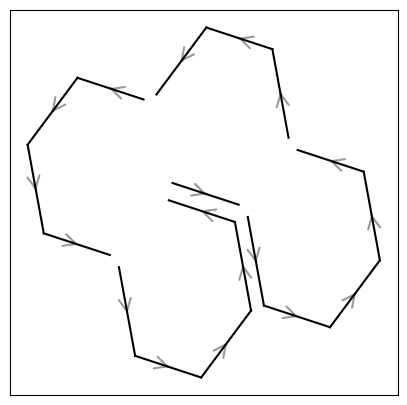

In [13]:
edges1 = edges - set([
    '1182830828bfffff', '1682830829dfffff',
    '118283082d7fffff', '16828308299fffff',
    '12828308299fffff', '1582830829dfffff',
    # '138283082d7fffff', '1482830829dfffff',
    # '128283082d7fffff', '1582830828bfffff',
])
fig = plot_edges(edges1)
fig.savefig('bah.png', dpi=600)

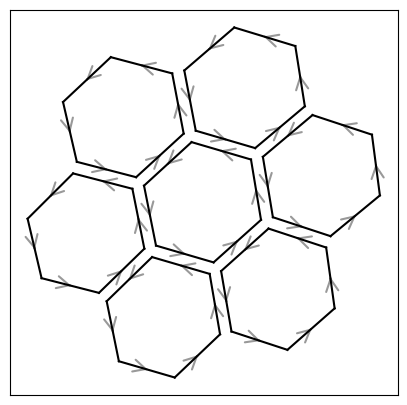

In [51]:
h = '840200bffffffff'
cells = h3.grid_disk(h, 1)

edges = set(
    e
    for c in cells
    for e in h3.origin_to_directed_edges(c)
)

fig = plot_edges(edges)
fig.savefig('bah.png')

In [56]:
edges0 = set(h3.origin_to_directed_edges(h))

edges0 = edges0 | reverse_set(edges0)

In [57]:
edges = edges - edges0

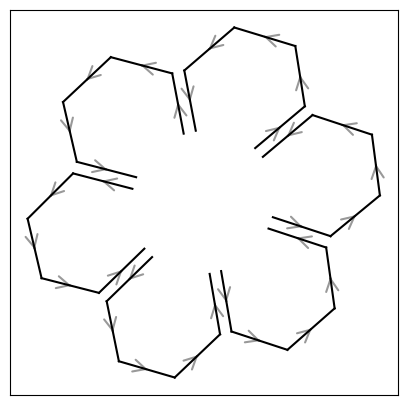

In [58]:
fig = plot_edges(edges)
fig.savefig('bah.png')

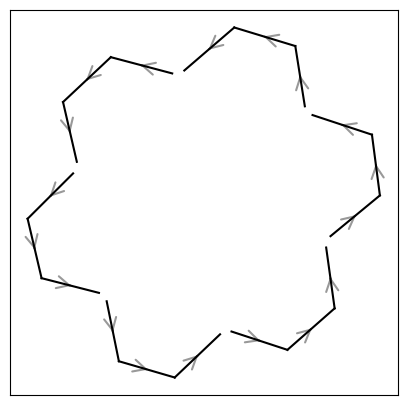

In [59]:
h = '840200bffffffff'
cells = h3.grid_disk(h, 1)

edges = set(
    e
    for c in cells
    for e in h3.origin_to_directed_edges(c)
)

edges = edges - reverse_set(edges)

fig = plot_edges(edges)
fig.savefig('bah.png')